## Time series analysis of madrids air quality over the year of 2001

### Aims
    - Load and assess data set
    - Visualise data of chosen problem
    - Process data into a form suitable for supervised learning
    - Predict next years first month
    - Evaluate performance of the model
    


Initial import and overview

In [1]:
import pandas as pd
df = pd.read_csv("G:\My Projects\madrid air\csvs_per_year\madrid_2001.csv")

In [2]:
print(df.head(5))
print("no. of stations")
print(df['station'].nunique())

                  date  BEN    CO   EBE  MXY  NMHC       NO_2        NOx  \
0  2001-08-01 01:00:00  NaN  0.37   NaN  NaN   NaN  58.400002  87.150002   
1  2001-08-01 01:00:00  1.5  0.34  1.49  4.1  0.07  56.250000  75.169998   
2  2001-08-01 01:00:00  NaN  0.28   NaN  NaN   NaN  50.660000  61.380001   
3  2001-08-01 01:00:00  NaN  0.47   NaN  NaN   NaN  69.790001  73.449997   
4  2001-08-01 01:00:00  NaN  0.39   NaN  NaN   NaN  22.830000  24.799999   

    OXY        O_3        PM10   PXY  SO_2   TCH    TOL   station  
0   NaN  34.529999  105.000000   NaN  6.34   NaN    NaN  28079001  
1  2.11  42.160000  100.599998  1.73  8.11  1.24  10.82  28079035  
2   NaN  46.310001  100.099998   NaN  7.85   NaN    NaN  28079003  
3   NaN  40.650002   69.779999   NaN  6.46   NaN    NaN  28079004  
4   NaN  66.309998   75.180000   NaN  8.80   NaN    NaN  28079039  
no. of stations
26


Can be seen that their are 26 different weather stations used for recording weather data.

In [3]:
print(df['station'].value_counts())

28079099    8760
28079012    8760
28079004    8760
28079003    8760
28079022    8760
28079023    8760
28079021    8760
28079019    8760
28079016    8760
28079040    8760
28079015    8760
28079014    8760
28079011    8760
28079009    8760
28079038    8760
28079039    8760
28079036    8760
28079035    8760
28079006    8760
28079001    8736
28079025    8736
28079024    8712
28079018    8160
28079007    7632
28079017    4824
28079008    4632
Name: station, dtype: int64


it appears that all but 7 stations have records at each time step, these 7 stations will be disregarded.

In [4]:
rm = [28079001, 28079025, 28079024, 28079018, 28079007, 28079017, 28079008]
print(len(rm))

for i in rm:
    df = df[df.station != i]

7


In [5]:
print(df['station'].value_counts())

28079099    8760
28079014    8760
28079004    8760
28079003    8760
28079022    8760
28079023    8760
28079021    8760
28079019    8760
28079016    8760
28079015    8760
28079040    8760
28079012    8760
28079011    8760
28079009    8760
28079038    8760
28079039    8760
28079036    8760
28079035    8760
28079006    8760
Name: station, dtype: int64


Initially one of the stations will be explored, taking the first station with complete records in the dataframe

In [6]:
stationdf = df[df['station'] == 28079099]

In [7]:
print(stationdf.head())

                    date   BEN    CO   EBE   MXY  NMHC       NO_2        NOx  \
23   2001-08-01 01:00:00  1.29  0.34  1.41  3.09  0.07  40.750000  51.570000   
47   2001-08-01 02:00:00  1.08  0.29  1.48  2.55  0.05  39.360001  47.150002   
71   2001-08-01 03:00:00  0.93  0.25  1.38  2.36  0.06  36.270000  42.110001   
95   2001-08-01 04:00:00  0.90  0.22  3.49  1.98  0.08  30.930000  35.110001   
119  2001-08-01 05:00:00  0.83  0.22  3.47  2.10  0.09  32.529999  36.590000   

      OXY        O_3        PM10   PXY  SO_2   TCH   TOL   station  
23   1.70  51.580002  102.199997  1.28  7.97  1.30  7.83  28079099  
47   1.48  52.919998   66.330002  1.06  7.87  1.27  8.11  28079099  
71   1.39  56.389999   51.369999  0.98  7.51  1.28  7.82  28079099  
95   1.16  61.490002   42.520000  0.82  7.15  1.31  7.96  28079099  
119  1.21  63.389999   41.630001  0.87  7.20  1.34  9.51  28079099  


In [34]:
print(stationdf.tail())

                      BEN    CO   EBE        MXY  NMHC       NO_2         NOx  \
date                                                                            
2001-12-31 20:00:00  7.66  2.79  8.63  16.389999  0.40  78.849998  343.600006   
2001-12-31 21:00:00  7.50  2.33  8.17  16.209999  0.30  73.779999  301.700012   
2001-12-31 22:00:00  6.34  2.17  6.70  12.170000  0.29  69.190002  281.600006   
2001-12-31 23:00:00  5.49  1.38  5.54  11.000000  0.17  61.400002  196.699997   
2002-01-01 00:00:00  2.84  1.05  4.34   8.550000  0.14  53.720001  149.899994   

                           OXY   O_3       PM10    PXY       SO_2   TCH  \
date                                                                      
2001-12-31 20:00:00  17.129999  4.40  56.250000  12.46  39.480000  1.69   
2001-12-31 21:00:00  17.709999  4.40  47.240002  11.98  37.660000  1.55   
2001-12-31 22:00:00  13.250000  4.42  48.730000   9.24  36.669998  1.54   
2001-12-31 23:00:00  10.860000  4.47  43.360001   8.26  3

In [8]:
print(stationdf.isnull().sum())

date         0
BEN         87
CO           1
EBE         84
MXY         96
NMHC       203
NO_2         1
NOx          1
OXY         76
O_3          1
PM10         1
PXY         77
SO_2         1
TCH        170
TOL        108
station      0
dtype: int64


As all values in the dataframe are numerical, the moderate number of missing values will simply be filled with the mean values of the data columns


In [9]:
stationdf.fillna(stationdf.mean(), inplace = True)

C:\Users\DUSHUMUN\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
print(stationdf.isnull().sum())

date       0
BEN        0
CO         0
EBE        0
MXY        0
NMHC       0
NO_2       0
NOx        0
OXY        0
O_3        0
PM10       0
PXY        0
SO_2       0
TCH        0
TOL        0
station    0
dtype: int64


In [11]:
print(stationdf.dtypes)

date        object
BEN        float64
CO         float64
EBE        float64
MXY        float64
NMHC       float64
NO_2       float64
NOx        float64
OXY        float64
O_3        float64
PM10       float64
PXY        float64
SO_2       float64
TCH        float64
TOL        float64
station      int64
dtype: object


observing the head and tail of the data frame it appears that the data ordering is off, beginning with august and ending with march/april, this will need to be addressed before continuing. The station column will also be dropped as all data now relates to a single station

In [14]:
stationdf = stationdf.sort_values(by = ['date'])

In [15]:
stationdf.drop(["station"], axis = 1)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL
108384,2001-01-01 01:00:00,3.23,1.25,2.56,4.580000,0.24,55.290001,120.000000,2.220000,7.830000,30.559999,1.800000,22.100000,1.58,10.740000
108409,2001-01-01 02:00:00,7.00,2.27,4.71,5.710000,0.38,55.849998,183.600006,2.630000,7.070000,43.209999,2.220000,24.010000,1.73,19.410000
108434,2001-01-01 03:00:00,9.77,2.35,6.63,10.160000,0.40,55.720001,214.399994,4.370000,6.830000,58.090000,3.890000,25.490000,1.78,29.270000
108459,2001-01-01 04:00:00,9.55,2.05,7.22,14.370000,0.37,56.599998,205.899994,6.450000,7.180000,47.970001,5.580000,23.620001,1.78,30.760000
108484,2001-01-01 05:00:00,7.34,1.44,5.52,11.570000,0.26,53.900002,164.500000,5.420000,7.970000,36.470001,4.510000,19.969999,1.80,24.490000
108509,2001-01-01 06:00:00,4.16,0.85,3.27,8.160000,0.17,49.389999,101.000000,3.950000,11.850000,21.129999,3.230000,15.560000,1.68,15.150000
108534,2001-01-01 07:00:00,2.68,0.62,2.44,6.420000,0.14,41.849998,72.010002,3.260000,21.100000,12.880000,2.550000,14.100000,1.46,10.610000
108559,2001-01-01 08:00:00,2.74,0.71,2.24,5.110000,0.15,41.299999,73.430000,2.820000,23.030001,11.120000,2.090000,14.090000,1.50,9.460000
108584,2001-01-01 09:00:00,3.22,0.70,2.69,5.670000,0.14,45.119999,82.269997,3.030000,22.059999,13.520000,2.290000,14.540000,1.58,10.650000
108609,2001-01-01 10:00:00,2.51,0.59,2.35,5.080000,0.10,44.139999,73.400002,2.700000,25.260000,14.850000,2.030000,14.820000,1.52,9.160000


In [16]:
print(stationdf.head())

                       date   BEN    CO   EBE    MXY  NMHC       NO_2  \
108384  2001-01-01 01:00:00  3.23  1.25  2.56   4.58  0.24  55.290001   
108409  2001-01-01 02:00:00  7.00  2.27  4.71   5.71  0.38  55.849998   
108434  2001-01-01 03:00:00  9.77  2.35  6.63  10.16  0.40  55.720001   
108459  2001-01-01 04:00:00  9.55  2.05  7.22  14.37  0.37  56.599998   
108484  2001-01-01 05:00:00  7.34  1.44  5.52  11.57  0.26  53.900002   

               NOx   OXY   O_3       PM10   PXY       SO_2   TCH    TOL  \
108384  120.000000  2.22  7.83  30.559999  1.80  22.100000  1.58  10.74   
108409  183.600006  2.63  7.07  43.209999  2.22  24.010000  1.73  19.41   
108434  214.399994  4.37  6.83  58.090000  3.89  25.490000  1.78  29.27   
108459  205.899994  6.45  7.18  47.970001  5.58  23.620001  1.78  30.76   
108484  164.500000  5.42  7.97  36.470001  4.51  19.969999  1.80  24.49   

         station  
108384  28079099  
108409  28079099  
108434  28079099  
108459  28079099  
108484  2807909

In [18]:
print(stationdf.tail())

                       date   BEN    CO   EBE        MXY  NMHC       NO_2  \
199459  2001-12-31 20:00:00  7.66  2.79  8.63  16.389999  0.40  78.849998   
199484  2001-12-31 21:00:00  7.50  2.33  8.17  16.209999  0.30  73.779999   
199509  2001-12-31 22:00:00  6.34  2.17  6.70  12.170000  0.29  69.190002   
199534  2001-12-31 23:00:00  5.49  1.38  5.54  11.000000  0.17  61.400002   
199559  2002-01-01 00:00:00  2.84  1.05  4.34   8.550000  0.14  53.720001   

               NOx        OXY   O_3       PM10    PXY       SO_2   TCH  \
199459  343.600006  17.129999  4.40  56.250000  12.46  39.480000  1.69   
199484  301.700012  17.709999  4.40  47.240002  11.98  37.660000  1.55   
199509  281.600006  13.250000  4.42  48.730000   9.24  36.669998  1.54   
199534  196.699997  10.860000  4.47  43.360001   8.26  32.450001  1.42   
199559  149.899994  10.420000  5.10  43.029999   7.39  28.920000  1.37   

              TOL   station  
199459  31.360001  28079099  
199484  29.139999  28079099  
19

the data is now in the correct order which will allow for a time series analysis of the data

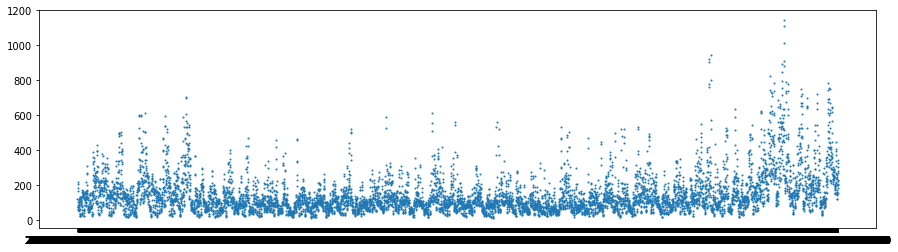

In [19]:
import matplotlib.pyplot as plt

x = stationdf['date']
y = stationdf['NOx']
plt.figure(figsize = (15,4))
plt.scatter(x,y, s=1)
plt.xlabel = ["time"]
plt.ylabel = ["micro grams N02 per cubic metre "]
plt.show()

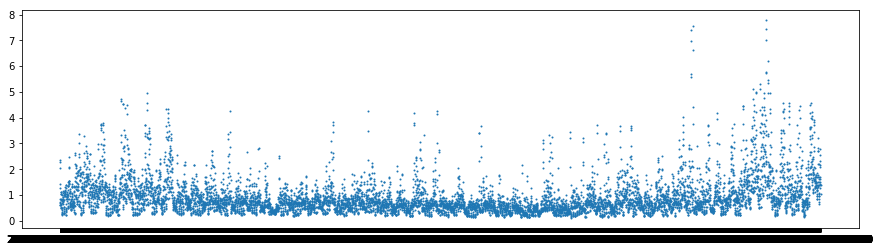

In [20]:
x = stationdf['date']
y = stationdf['CO']
plt.figure(figsize = (15,4))
plt.scatter(x,y, s=1)
plt.xlabel = ["time"]
plt.ylabel = ["micro grams CO per cubic metre "]
plt.show()

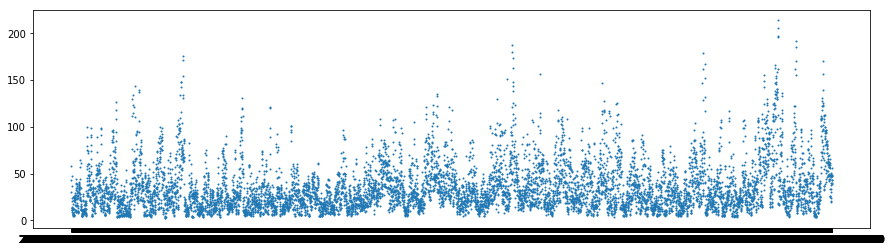

In [21]:
x = stationdf['date']
y = stationdf['PM10']
plt.figure(figsize = (15,4))
plt.scatter(x,y, s=1)
plt.xlabel = ["time"]
plt.ylabel = ["micro grams CO per cubic metre "]
plt.show()

before making predictions of the PM10 levels over time, feature values must be normalised

In [22]:
stationdf.reset_index(drop = True, inplace = True)
print(stationdf.head())


                  date   BEN    CO   EBE    MXY  NMHC       NO_2         NOx  \
0  2001-01-01 01:00:00  3.23  1.25  2.56   4.58  0.24  55.290001  120.000000   
1  2001-01-01 02:00:00  7.00  2.27  4.71   5.71  0.38  55.849998  183.600006   
2  2001-01-01 03:00:00  9.77  2.35  6.63  10.16  0.40  55.720001  214.399994   
3  2001-01-01 04:00:00  9.55  2.05  7.22  14.37  0.37  56.599998  205.899994   
4  2001-01-01 05:00:00  7.34  1.44  5.52  11.57  0.26  53.900002  164.500000   

    OXY   O_3       PM10   PXY       SO_2   TCH    TOL   station  
0  2.22  7.83  30.559999  1.80  22.100000  1.58  10.74  28079099  
1  2.63  7.07  43.209999  2.22  24.010000  1.73  19.41  28079099  
2  4.37  6.83  58.090000  3.89  25.490000  1.78  29.27  28079099  
3  6.45  7.18  47.970001  5.58  23.620001  1.78  30.76  28079099  
4  5.42  7.97  36.470001  4.51  19.969999  1.80  24.49  28079099  


In [23]:
stationdf.set_index('date', inplace=True)

Values in the set must be normalised to ensure features have equal weighting when building the predictive model.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range =(0,1))
values = stationdf.values
values = values.astype("float32")
scaled_val = scaler.fit_transform(values)



Data set must be modified to include the sample feature values observed at time t-1 as features for the sample at time t

In [35]:
from pandas import DataFrame
from pandas import concat
from numpy import concatenate

def series_to_supervised(data, n_in=1, n_out = 1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    #input sequence
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    #forcast sequence
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
    # combine both
    agg = concat(cols, axis=1)
    agg.columns = names
    ## drop null values
    if dropnan:
        agg.dropna(inplace = True)
    return agg
    

In [36]:
ts_df = series_to_supervised(scaled_val,1,1)

In [37]:
print(ts_df.head(5))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.108000   0.148631   0.086542   0.057379   0.104762   0.215133   
2   0.245091   0.281617   0.175569   0.073794   0.171429   0.217638   
3   0.345818   0.292047   0.255072   0.138437   0.180952   0.217057   
4   0.337818   0.252934   0.279503   0.199593   0.166667   0.220994   
5   0.257455   0.173403   0.209110   0.158919   0.114286   0.208913   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...      var6(t)   var7(t)  \
1   0.097247   0.059406   0.033599    0.131729    ...     0.217638  0.153371   
2   0.153371   0.073904   0.027987    0.191670    ...     0.217057  0.180551   
3   0.180551   0.135431   0.026215    0.262178    ...     0.220994  0.173050   
4   0.173050   0.208982   0.028799    0.214225    ...     0.208913  0.136516   
5   0.136516   0.172560   0.034633    0.159733    ...     0.188733  0.080480   

    var8(t)   var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  \
1  0.073904  0.02

In [38]:
print(ts_df.tail(5))

      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
8755   0.294545   0.318123   0.365217   0.242156   0.166667   0.332319   
8756   0.269091   0.349413   0.337888   0.228937   0.180952   0.320551   
8757   0.263273   0.289439   0.318841   0.226322   0.133333   0.297866   
8758   0.221091   0.268579   0.257971   0.167635   0.128571   0.277328   
8759   0.190182   0.165580   0.209938   0.150639   0.071429   0.242472   

      var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...      var6(t)  \
8755   0.280004   0.708628   0.008271    0.213040    ...     0.320551   
8756   0.294564   0.586634   0.008271    0.253459    ...     0.297866   
8757   0.257589   0.607143   0.008271    0.210766    ...     0.277328   
8758   0.239852   0.449434   0.008418    0.217826    ...     0.242472   
8759   0.164931   0.364922   0.008787    0.192381    ...     0.208108   

       var7(t)   var8(t)   var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  \
8755  0.294564  0.586634  0.008271  0.

In [29]:
values = ts_df.values
n_train_hours = 360*24
train = values[:n_train_hours,:]
test = values[n_train_hours:, :]
#split into inputs and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshape input to be 3D[samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8640, 1, 29) (8640,) (119, 1, 29) (119,)


initially we are going to try and predict the last 4 days of the year

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\DUSHUMUN\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 8640 samples, validate on 119 samples
Epoch 1/50
 - 1s - loss: 0.0022 - val_loss: 0.0078
Epoch 2/50
 - 0s - loss: 0.0016 - val_loss: 0.0075
Epoch 3/50
 - 0s - loss: 0.0012 - val_loss: 0.0043
Epoch 4/50
 - 0s - loss: 0.0012 - val_loss: 0.0036
Epoch 5/50
 - 0s - loss: 0.0012 - val_loss: 0.0024
Epoch 6/50
 - 0s - loss: 0.0011 - val_loss: 0.0027
Epoch 7/50
 - 0s - loss: 8.7774e-04 - val_loss: 0.0023
Epoch 8/50
 - 0s - loss: 9.7247e-04 - val_loss: 7.7746e-04
Epoch 9/50
 - 0s - loss: 9.4035e-04 - val_loss: 0.0016
Epoch 10/50
 - 0s - loss: 8.5406e-04 - val_loss: 0.0013
Epoch 11/50
 - 0s - loss: 5.5182e-04 - val_loss: 0.0023
Epoch 12/50
 - 0s - loss: 9.7662e-04 - val_loss: 0.0025
Epoch 13/50
 - 0s - loss: 0.0013 - val_loss: 0.0016
Epoch 14/50
 - 0s - loss: 7.3017e-04 - val_loss: 0.0012
Epoch 15/50
 - 0s - loss: 5.6022e-04 - val_loss: 7.0547e-04
Epoch 16/50
 - 0s - loss: 5.6094e-04 - val_loss: 0.0011
Epoch 17/50
 - 0s - loss: 7.7386e-04 - val_loss: 0.0024
Epoch 18/50
 - 0s - loss: 7.97

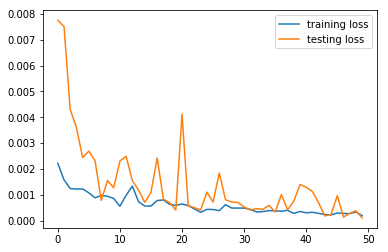

In [31]:
model = Sequential()
model.add(LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer ='adam')

history = model.fit(train_X, train_y, epochs = 50, batch_size = 32, validation_data = (test_X, test_y), verbose=2, shuffle = False)

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'testing loss')
plt.legend()
plt.show()